In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
x1=np.loadtxt("nonlinearSE/potential-g.dat")
x2=np.loadtxt("nonlinearSE/dens-g.dat")
y0=np.loadtxt("nonlinearSE/gg-g.dat")
y1=np.loadtxt("nonlinearSE/eint-g.dat")
y2=np.loadtxt("nonlinearSE/ekin-g.dat")
y3=np.loadtxt("nonlinearSE/epot-g.dat")

In [3]:
X=np.concatenate((x1,x2),axis=1)
y=y0

In [4]:
y=np.concatenate((y0,y1,y2,y3))
y=y.reshape(4,10000).transpose()

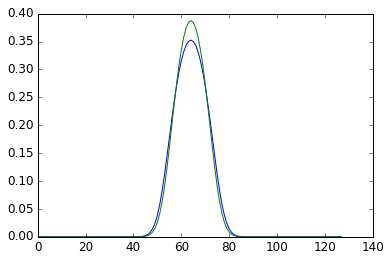

In [5]:
plt.plot(x2[1])
plt.plot(x2[2])

## Decision Tree

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [46]:
y_pred = tree_reg.predict(X_test)

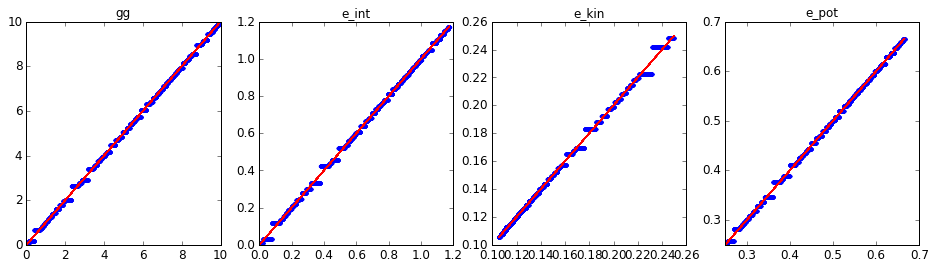

In [47]:
f, ax = plt.subplots(1,4,figsize=(16, 4))
titles=["gg","e_int","e_kin","e_pot"]
for i in range(4):
    ax[i].plot(y_test[:,i],y_pred[:,i],'.')
    ax[i].plot(y_test[:,i],y_test[:,i],'r-')
    ax[i].set_title(titles[i])

In [48]:
tree_reg.score(X_test,y_test)

0.99923497639952175

## Kernel Ridge Regression

In [19]:
from sklearn.kernel_ridge import KernelRidge

In [20]:
#clf = KernelRidge(alpha=1.0,degree=10,kernel='rbf')
#clf = KernelRidge(alpha=1.0,degree=10,kernel='polynomial')
clf = KernelRidge(alpha=1.0,degree=10,kernel='linear')
clf.fit(X, y) 

KernelRidge(alpha=1.0, coef0=1, degree=10, gamma=None, kernel='linear',
      kernel_params=None)

In [21]:
y_pred_KRR = clf.predict(X_test)

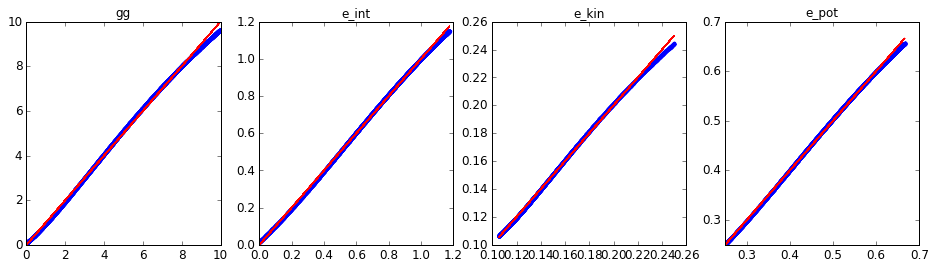

In [22]:
f, ax = plt.subplots(1,4,figsize=(16, 4))
titles=["gg","e_int","e_kin","e_pot"]
for i in range(4):
    ax[i].plot(y_test[:,i],y_pred_KRR[:,i],'.')
    ax[i].plot(y_test[:,i],y_test[:,i],'r-')
    ax[i].set_title(titles[i])

In [23]:
score_KRR=clf.score(X_test,y_test)

In [24]:
score_KRR

0.99848694227906476